# Bill or Neil?

When my girls were little, I often spent time watching Bill Nye The Science Guy with them. Bill Nye is one of my most admired modern scientists. 

Another scientist that I admire the most is Neil deGrasse Tyson. I can bing watch Neil's cosmic series on Netflix all day long.

I wonder what these two great scientists often tweet about. 

In this project, I scrap their tweets trying to find out what these two great scientists often talk about, how many people like what they say, and how many times their tweets being retweeted.  

I also want to use machine learning on user prediction. 


In [1]:
# First, import libraries

import twitter, re, datetime, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
# Set up twitter credential 

# your keys go here:
twitter_keys = {
    'consumer_key':        'VgoJyqsPKIJiJFKCZ0jxtK2K0',
    'consumer_secret':     '2a4LDYNR2HnkLBkCLgtpmdCTcqKSD9pRjTIU2LXRKkbQz6DXQD',
    'access_token_key':    '202347836-xYk1wedC9Ohb1hW1cnm480pe4HyjemEVxVGkYJW6',
    'access_token_secret': 'kpgjoxRgAWrMx0OUWit8Rv3cYFEoLGGDBGzRKGRWHQBMt'
}

api = twitter.Api(
    consumer_key         =   twitter_keys['consumer_key'],
    consumer_secret      =   twitter_keys['consumer_secret'],
    access_token_key     =   twitter_keys['access_token_key'],
    access_token_secret  =   twitter_keys['access_token_secret']
)


In [3]:
# Setup a TweetMiner object

class TweetMiner(object):

    result_limit    =   100    
    api             =   False
    data            =   []
    
    def __init__(self, keys_dict, api, result_limit = 100):
        
        self.api = api
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="user", mine_rewteets=False, max_pages=5):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            
            if last_tweet_id:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit, max_id=last_tweet_id - 1)        
            else:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit)
                
            for item in statuses:

                mined = {
                    #'tweet_id':        item.id,
                    #'location':        item.location,
                    #'place':           item.place,
                    'handle':          item.user.name,
                    'favorite_count':  item.favorite_count,
                    'retweet_count':   item.retweet_count,
                    'text':            item.text,
                    'hashtags':        item.hashtags,
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at
                }
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data

In [4]:
# create a miner object

miner = TweetMiner(keys_dict = twitter_keys, api = api, result_limit = 500)

In [5]:
# check sample results

bill = miner.mine_user_tweets(user = 'BillNye')
neil = miner.mine_user_tweets(user = 'neiltyson')

neil[:2]

[{'created_at': 'Mon Jan 08 16:46:31 +0000 2018',
  'favorite_count': 430,
  'handle': 'Neil deGrasse Tyson',
  'hashtags': [],
  'mined_at': datetime.datetime(2018, 1, 9, 8, 47, 20, 137541),
  'retweet_count': 7,
  'text': '@AndreLeFrance : - )    Yup.  It comes with the territory.'},
 {'created_at': 'Mon Jan 08 16:37:33 +0000 2018',
  'favorite_count': 7,
  'handle': 'Neil deGrasse Tyson',
  'hashtags': [],
  'mined_at': datetime.datetime(2018, 1, 9, 8, 47, 20, 137549),
  'retweet_count': 2,
  'text': '@BradPrugar We’ve found a black hole in the center of every galaxy for which we’ve had equipment sensitive enough t… https://t.co/5tW9ts3BsE'}]

## Tweets Exploration

In [6]:
# Put the results into dataframe & check 10 samples

bill_df = pd.DataFrame(bill)
neil_df = pd.DataFrame(neil)
bill_df.head(10)


,created_at,favorite_count,handle,hashtags,mined_at,retweet_count,text
0,Mon Jan 01 23:03:29 +0000 2018,0,Bill Nye,"[{""text"": ""BNSTW""}]",2018-01-09 08:47:17.707588,320,RT @BillNyeSaves: Happy 2018! @BillNye challen...
1,Sun Dec 31 02:36:43 +0000 2017,0,Bill Nye,"[{""text"": ""BNSTW""}]",2018-01-09 08:47:17.707596,128,RT @BillNyeSaves: .@BillNye and @okgo teaming ...
2,Sun Dec 31 02:33:30 +0000 2017,630,Bill Nye,[],2018-01-09 08:47:17.707598,86,"Hmm... let's see, how about Stranger Science? ..."
3,Fri Dec 29 20:59:54 +0000 2017,3763,Bill Nye,"[{""text"": ""BillNyeSavesTheWorld""}]",2018-01-09 08:47:17.707600,681,Hold on to your bowties peoples... #BillNyeSav...
4,Wed Dec 27 22:53:16 +0000 2017,0,Bill Nye,[],2018-01-09 08:47:17.707602,373,"RT @BillNyeSaves: This just in, THE EARTH IS N..."
5,Mon Dec 25 23:15:40 +0000 2017,14080,Bill Nye,[],2018-01-09 08:47:17.707604,1836,Happy Isaac Newton’s Birthday! Let’s make 2018...
6,Thu Dec 21 17:14:59 +0000 2017,18629,Bill Nye,[],2018-01-09 08:47:17.707606,4513,Happy Solstice! Shortest day for us North hemi...
7,Thu Dec 21 00:05:39 +0000 2017,0,Bill Nye,"[{""text"": ""BNSTW""}]",2018-01-09 08:47:17.707607,1008,"RT @BillNyeSaves: Woah, dude. Season 2 starts ..."
8,Thu Dec 07 23:21:02 +0000 2017,0,Bill Nye,[],2018-01-09 08:47:17.707609,104,RT @exploreplanets: These are a few of our fav...
9,Thu Dec 07 18:47:40 +0000 2017,721,Bill Nye,[],2018-01-09 08:47:17.707611,59,I’ll be talking LA fires with @camanpour at 2p...


In [7]:
# Check how many tweets were scrapped from both scientists
print(bill_df.shape)
print (neil_df.shape)

# Each have 1000 tweets.

(1000, 7)
(1000, 7)


In [9]:
print ('The most recent tweet from Bill Nye is created at: ', bill_df['created_at'][0])
print ('The oldest tweet from the Bill Nye tweet dataset is: ', bill_df['created_at'][999])

# Bill Nye's dataset contains about 4-year worth of tweets. 

The most recent tweet from Bill Nye is created at:  Mon Jan 01 23:03:29 +0000 2018
The oldest tweet from the Bill Nye tweet dataset is:  Sun Oct 12 03:39:29 +0000 2014


In [10]:
bill_df.describe()

# Wow, there is a 143083 likes on a tweet. The most retweet is 91105. 
# In average, Bill has 2400 likes with standard deviationof 8334. This still more than a thousand likes. 

,favorite_count,retweet_count
count,1000.000000,1000.000000
mean,2463.178000,1107.106000
std,8334.090586,4680.627505
min,0.000000,0.000000
25%,0.000000,107.750000
50%,650.500000,254.000000
75%,1993.000000,662.500000
max,143083.000000,91105.000000


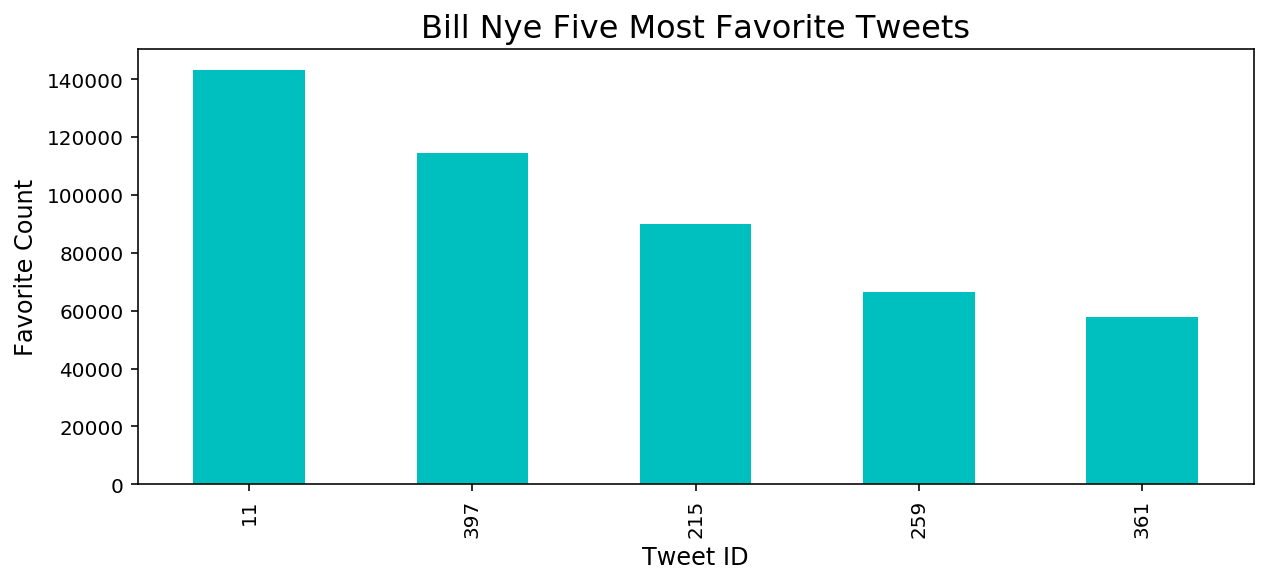

In [11]:
# Look at Bill 5 most liked tweet

bill_df['favorite_count'].sort_values(ascending = False)[:5].plot(kind = 'bar',
                                                                   figsize = (10, 4),
                                                                  color = 'c')
plt.title('Bill Nye Five Most Favorite Tweets', fontsize = 16)
plt.xlabel('Tweet ID', fontsize = 12)
plt.ylabel('Favorite Count', fontsize = 12)
plt.show()


In [12]:
# Bill tweets receive a lot of likes, especially the tweet line item 11, 397, 215, 259, and 361. 
# Let's see what these tweets were talking about. 

print (bill_df.iloc[11,6])
print (bill_df.iloc[397,6])
print (bill_df.iloc[215,6])
print (bill_df.iloc[259,6])
print (bill_df.iloc[361,6])


My lab coat is in the Smithsonian. Hope you’ll visit. https://t.co/934WsvaHkx
"They" don't want you to be concerned about climate change, but @djkhaled &amp; I want you to be. Major 🔑/ Major 🔬 https://t.co/gKtI2TZLnC
Ordering the EPA or NASA not to talk about climate change isn’t going to cool things off. Don't double down on deni… https://t.co/p8J7MRxjwc
Happy Thanksgiving to all! https://t.co/FA12naYawU
Don't ever let them tell you science isn't cool. @neiltyson https://t.co/OjDI51e8HM


The most favorite tweet from Bill Nye is about his lab coat being conserved in Smithsonian. It captured more than 140000 likes. Awwww. He deserves it!

The next favorite likes from Bill relates to climate change, encourge science and discovery. Don't you love the latest 'Bill Nye Saves The World' Netflix series?

Yes science is COOL!!!! 

He is my guy! 

Let's check Neil.

In [14]:
print ('The most recent tweet from Neil Tyson is created at: ', neil_df['created_at'][0])
print ('The oldest tweet of the Neil Tyson tweet dataset is: ', neil_df['created_at'][999])


The most recent tweet from Neil Tyson is created at:  Mon Jan 08 16:46:31 +0000 2018
The oldest tweet of the Neil Tyson tweet dataset is:  Fri Nov 13 17:32:34 +0000 2015


**Neil's twitter dataset is about 2 years worth of tweets. He seems to tweet more than Bill.**

** Let's check which tweets from Neil get the most likes.**

In [15]:
neil_df.describe()

,favorite_count,retweet_count
count,1000.000000,1000.000000
mean,15789.630000,5427.304000
std,32507.746589,12702.757881
min,0.000000,0.000000
25%,508.500000,67.250000
50%,4601.500000,1007.500000
75%,17424.000000,5185.750000
max,355776.000000,142330.000000


Oh wow!!!! 355836 likes with 142330 retweet. Let's check it out. 

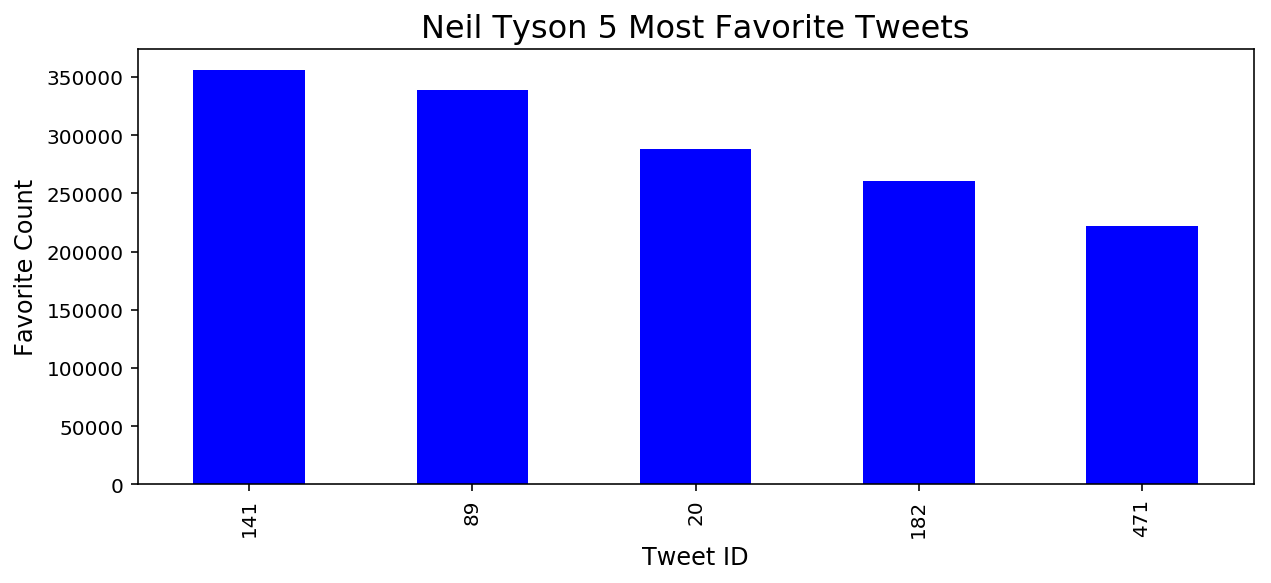

In [16]:
# Look at Bill most favorite tweet

neil_df['favorite_count'].sort_values(ascending = False)[:5].plot(kind = 'bar',
                                                                   figsize = (10, 4),
                                                                  color = 'b')
plt.title('Neil Tyson 5 Most Favorite Tweets', fontsize = 16)
plt.xlabel('Tweet ID', fontsize = 12)
plt.ylabel('Favorite Count', fontsize = 12)
plt.show()

In [17]:
# Let's see what these tweets were talking about from Neil. 

print (neil_df.iloc[141,6])
print (neil_df.iloc[89,6])
print (neil_df.iloc[20,6])
print (neil_df.iloc[182,6])
print (neil_df.iloc[471,6])

In school, students cheat because the system values high grades more than students value learning.
Let’s Make America Smart Again.
Merry Christmas to the world’s 2.5 billion Christians. And to the remaining 5 billion people, including Muslims Ath… https://t.co/ovBFBiOsgU
Odd. No one is in denial of America’s Aug 21 total solar eclipse. Like Climate Change, methods &amp; tools of science predict it.
I dream of a world where the truth is what shapes people's politics, rather than politics shaping what people think is true.


I totally agree education system emphasizes too much on grades instead of learning.

Overwhelmingly agreed by people, but still, there isn't an alternative or should I say, another popular system to measure level of student competency except throwing them into a test pit. 


## Word Frequency

One of the ways to analyze user tweeting style and what they commonly talk about is word frequency. 

Every user has their favorite words to use. Let's break down the two users' tweets and find out what words they like to use. 

In [18]:
# nltk has a word tokenizer that would break down the words. 

#import nltk library
import nltk
from nltk.tokenize import word_tokenize

# test how a tweet being tokenized using nltk tokenizer
test_tweet = bill_df['text'][7]
print ('Original_test_tweet --> ', test_tweet)

print ('-------')

tokenize_test_tweet = word_tokenize(test_tweet)
print('Tokenize_test_tweet -->  ', tokenize_test_tweet)

Original_test_tweet -->  RT @BillNyeSaves: Woah, dude. Season 2 starts off with a bong...we mean, bang. #BNSTW https://t.co/PKRWKfT1rt
-------
Tokenize_test_tweet -->   ['RT', '@', 'BillNyeSaves', ':', 'Woah', ',', 'dude', '.', 'Season', '2', 'starts', 'off', 'with', 'a', 'bong', '...', 'we', 'mean', ',', 'bang', '.', '#', 'BNSTW', 'https', ':', '//t.co/PKRWKfT1rt']


**The nltk word tokenizer breaks down words using standard English words.**


**But social media chats are different, especially tweets. Tweets have a lot of**
* hashtags begin with #, 
* mentions begin with @, 
* urls begin with http(s), and 
* emojis

** These should be treated as one string of word. For example, https://t.co/PKRWKfT1rt should be treated as an url. But nltk tokenizer breaks the url into three parts:**

    1) https
    2) :
    3) //t.co/PKRWKfT1rt
    

Some words such as 'i', 'me', 'my' etc. are very common and used on all types of writings. But these words do not help on distinguishing user writing style, pattern analysis, and predictions.

These words are called stop words.

nltk has a ‘stopword’ library that can remove these stop words.

Punctuations also have are irrelevent when it comes to sentiment analysis except they come with the #hashtags, @mentions, and http(s)//:url. We need to eliminate these punctuations. String library has the list of punctuations. 


In [19]:
# Import the stopwords library from nltk and punctuations from string. 

from nltk.corpus import stopwords
import string

stopwords = stopwords.words('english')

punctuations = list(string.punctuation)

# Take a look at the stopwords and punctuations for eliminations
print(stopwords)

print(punctuations)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
# there may be some additional non-meaningful words we want to remove as well. 
# Let's create a list called do_not_want_list.
# Words that have no impact on sentiment analysis can be added to this extended list. 

do_not_want_list = ['rt', 'amp', 'q', '1', '2', '3', '4', '5', 
                    '6', '7', '8', '9', '10', '11', '12', '13','14', '15', '16',
                    '17', '18', '19', '20', '21', '22', '23', '24', '25', 
                    '26', '27', '28', '29', '30', '31',"i'am", "it's", "don't", 
                    'w', 'bill', '@billnye', "let's", 'https', 'us', 'fyi', 'would', 'one']
                

In [22]:
# Combine all the stop words, punctunation, and do_not_want_list for removal

stop = stopwords + punctuations + do_not_want_list

In [23]:
# Since we want the emojis, the hashtags with #, the mention with @, 
# and the web addresses with http/https: tokenized as whole string, 
# we need to tokenize them differently.
# I borrowed this code from Marco Bonazani and twist it a bit to accomodate my requirements. 
# Thank you Marco. 

# Keep the emojis
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

# Keep the special phases
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
    r'^\d*'
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def tweet_preprocess(s, lowercase=False):
    tokens = tokenize(s)
    tokens = [word for word in tokens if not word in stop]
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [24]:
# Compare how the tweet being tokenized now using customized tokenization.

print ('Original_test_tweet --> ', test_tweet)

print ('---------------------------------------')

tokenize_test_tweet = word_tokenize(test_tweet)
print('Standard_tokenize_test_tweet -->  ', tokenize_test_tweet)

print ('---------------------------------------')

print('Customize_tokenize_test_tweet --> ', tweet_preprocess(test_tweet))


Original_test_tweet -->  RT @BillNyeSaves: Woah, dude. Season 2 starts off with a bong...we mean, bang. #BNSTW https://t.co/PKRWKfT1rt
---------------------------------------
Standard_tokenize_test_tweet -->   ['RT', '@', 'BillNyeSaves', ':', 'Woah', ',', 'dude', '.', 'Season', '2', 'starts', 'off', 'with', 'a', 'bong', '...', 'we', 'mean', ',', 'bang', '.', '#', 'BNSTW', 'https', ':', '//t.co/PKRWKfT1rt']
---------------------------------------
Customize_tokenize_test_tweet -->  ['RT', '@BillNyeSaves', 'Woah', 'dude', 'Season', 'starts', 'bong', 'mean', 'bang', '#BNSTW', 'https://t.co/PKRWKfT1rt']


** The customized tokenization is not perfect. But the function keeps the hashtags, the mentions and the url intact. **

** Punctuations such as individual ':', '&', ';' also removed.**

** Stop words such as 'off' and 'with' are removed. The word 'As' is not removed because we have not make it a lowercase yet. If you notice, all stop words are in lowercase. **

** There are some words such as 'RT', meaning retweet, 'amp', and the date break down will not have much meaningful on user and topic predictions. These will be added to the do_not_want_list for removal.**

** What we are going to do next is to create a corpus using the customized tokenizer. **



In [25]:
# Now we create corpus for each scientist 

bill_corpus = []

for word in bill_df['text']:
    word = word.lower() # put all the words in lowercase
    tweets = tweet_preprocess(word)
    bill_corpus.extend(tweets)
print(bill_corpus[:20])

['@billnyesaves', 'happy', '2018', 'challenges', 'take', 'science-focused', 'resolutions', '#bnstw', 'https://t.co/mpdlotchpe', '@billnyesaves', '@okgo', 'teaming', 'science', 'could', 'better', '#bnstw', 'https://t.co/mfygd1n4g4', 'hmm', 'see', 'stranger']


In [26]:
# Create a corpus for Neil

neil_corpus=[]

for word in neil_df['text']:
    word = word.lower() # put all the words in lowercase
    tweets = tweet_preprocess(word)
    neil_corpus.extend(tweets)
print(neil_corpus[:20])

['@andrelefrance', 'yup', 'comes', 'territory', '@bradprugar', 'found', 'black', 'hole', 'center', 'every', 'galaxy', 'equipment', 'sensitive', 'enough', 'https://t.co/5tw9ts3bse', 'studying', 'succeed', 'spite', 'broken', 'childhoods']


### Bill Nye's 20 Most Common Words

In [27]:
# Create a counter to count the words

from collections import Counter
bill_counter = Counter()

In [28]:
# Loop through the Bill's corpus to count words

for word in bill_corpus:
    bill_counter[word] +=1
    
# Check the 20 most common words Bill uses   
print(bill_counter.most_common(20))

[('science', 113), ('change', 85), ('world', 76), ('climate', 69), ('@exploreplanets', 68), ('day', 58), ('today', 53), ('get', 52), ('new', 39), ('tonight', 38), ('space', 37), ('happy', 33), ('time', 33), ('@billnyefilm', 33), ('join', 32), ('big', 32), ('#strictlyscience', 31), ("we're", 28), ('thank', 27), ("i'm", 27)]


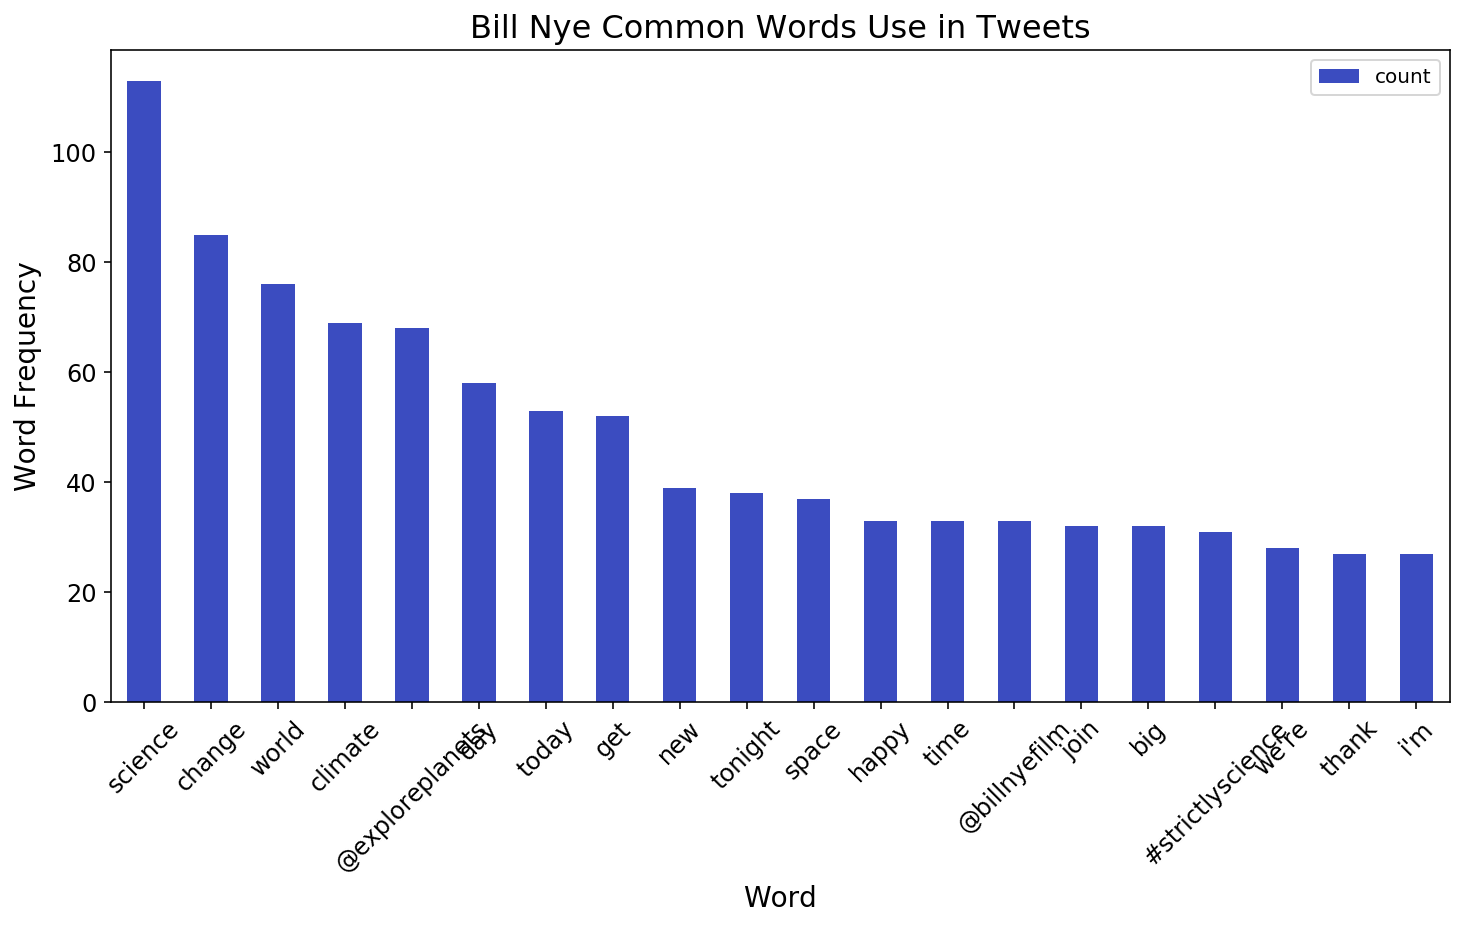

In [29]:
bill_common_words = pd.DataFrame(bill_counter.most_common(20), columns = ['word', 'count'])
bill_common_words.plot(x = 'word', y = 'count', kind = 'bar', figsize = (12, 6), fontsize=12,
                      colormap = 'coolwarm', rot = 45)

plt.title('Bill Nye Common Words Use in Tweets', fontsize = 16)
plt.xlabel('Word', fontsize = 14)
plt.ylabel('Word Frequency', fontsize = 14)
plt.show()


** OK, we have Bill's most common word tally. **

** Bill likes to talk about science (yes of course, he is a scientist). He uses the words change, world, and climate a lot. **

** Bill also mentions exploring planets many times.**

** Let's check Neil.**

### Neil Tyson 20 Most Common Words

In [30]:
# Loop through the Neil's corpus to count words
neil_counter = Counter()

for word in neil_corpus:
    neil_counter[word] +=1
# check the most common 20 words    
print(neil_counter.most_common(20))

[('earth', 84), ('@startalkradio', 74), ('posted', 69), ('people', 56), ('moon', 49), ('time', 48), ('day', 47), ('science', 47), ('cosmic', 44), ('like', 42), ('world', 41), ('@itunespodcasts', 38), ('years', 31), ('universe', 30), ('know', 30), ('good', 29), ('last', 28), ('sun', 27), ('space', 27), ('never', 27)]


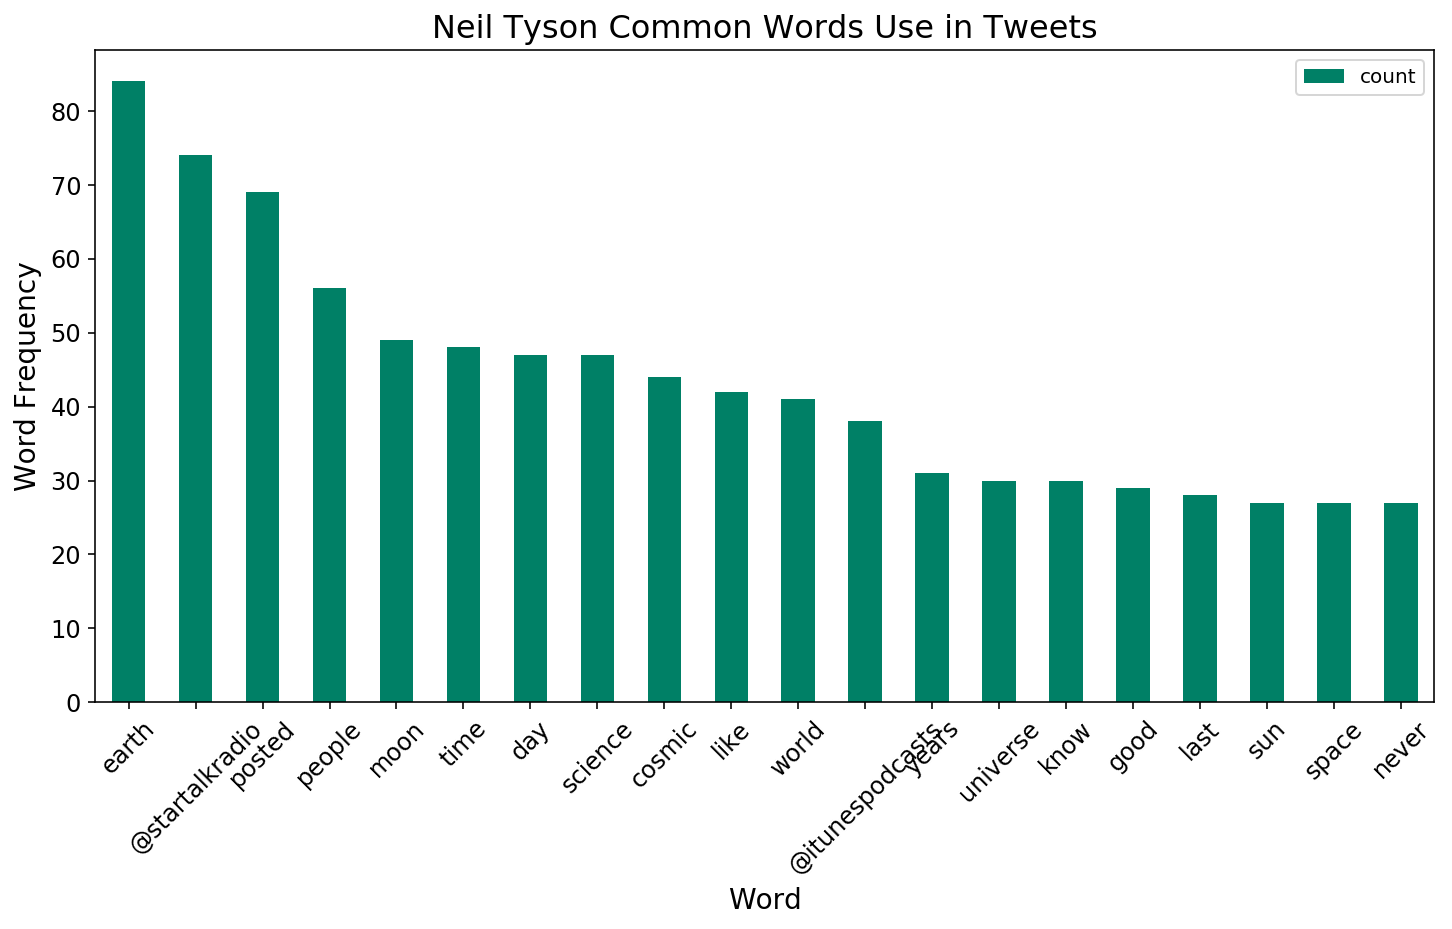

In [31]:
neil_common_words = pd.DataFrame(neil_counter.most_common(20), columns = ['word', 'count'])
neil_common_words.plot(x = 'word', y = 'count', kind = 'bar', figsize = (12, 6), fontsize=12,
                      colormap = 'summer', rot = 45)

plt.title('Neil Tyson Common Words Use in Tweets', fontsize = 16)
plt.xlabel('Word', fontsize = 14)
plt.ylabel('Word Frequency', fontsize = 14)
plt.show()

** My perception is that Neil usually focus on other planets. But he cares about the ultimate home we live, the earth and the people.** 


In [36]:
# Let's look at the word cloud

more_stop_words = {'word', 'count'}
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS.union(more_stop_words))

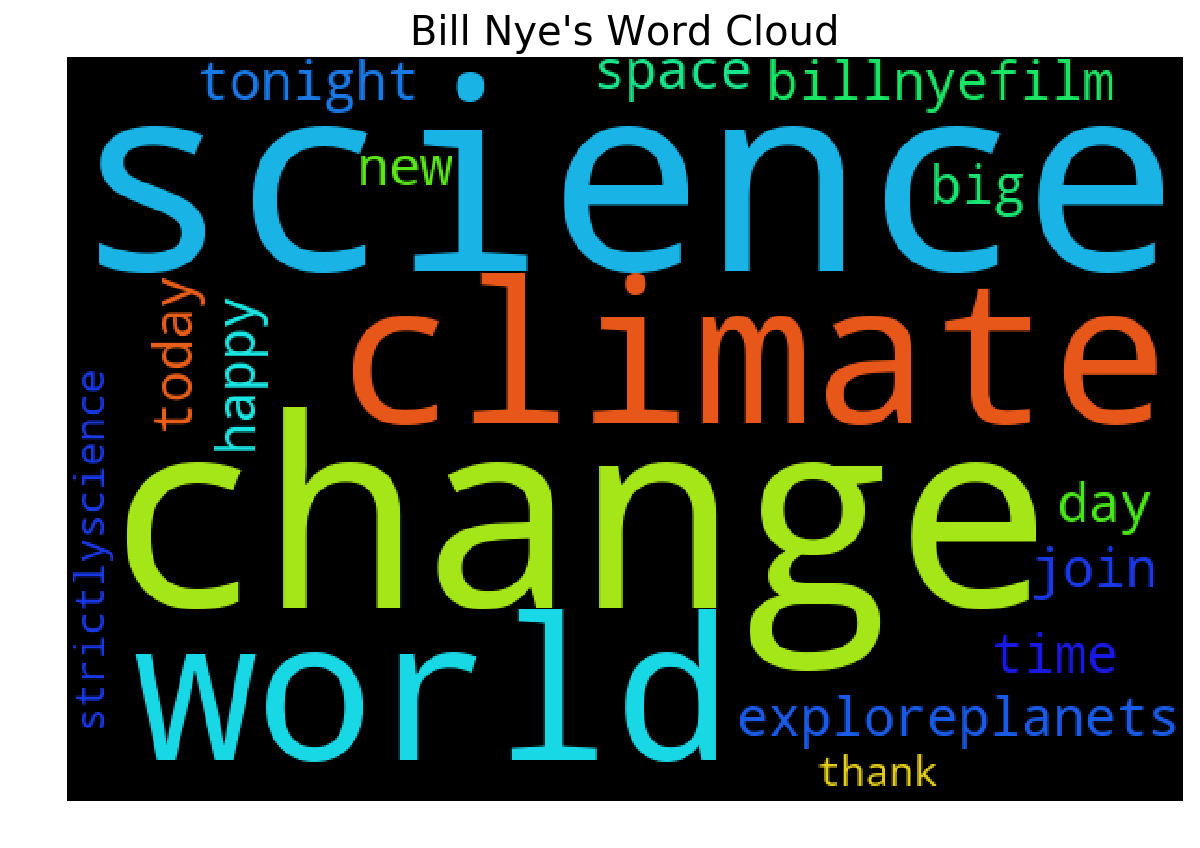

In [40]:
# Visualize Bill Nye's frequent word use with wordcloud

wordcloud = WordCloud(background_color='black',
                     stopwords = stopwords,
                     width = 600,
                     height = 400,
                     ).generate(str(bill_common_words[:50]))


print(wordcloud)
fig = plt.figure(figsize=(10,10))
plt.title("Bill Nye's Word Cloud", fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

                     

Science, climate change, and world mostly talked about by Bill. 

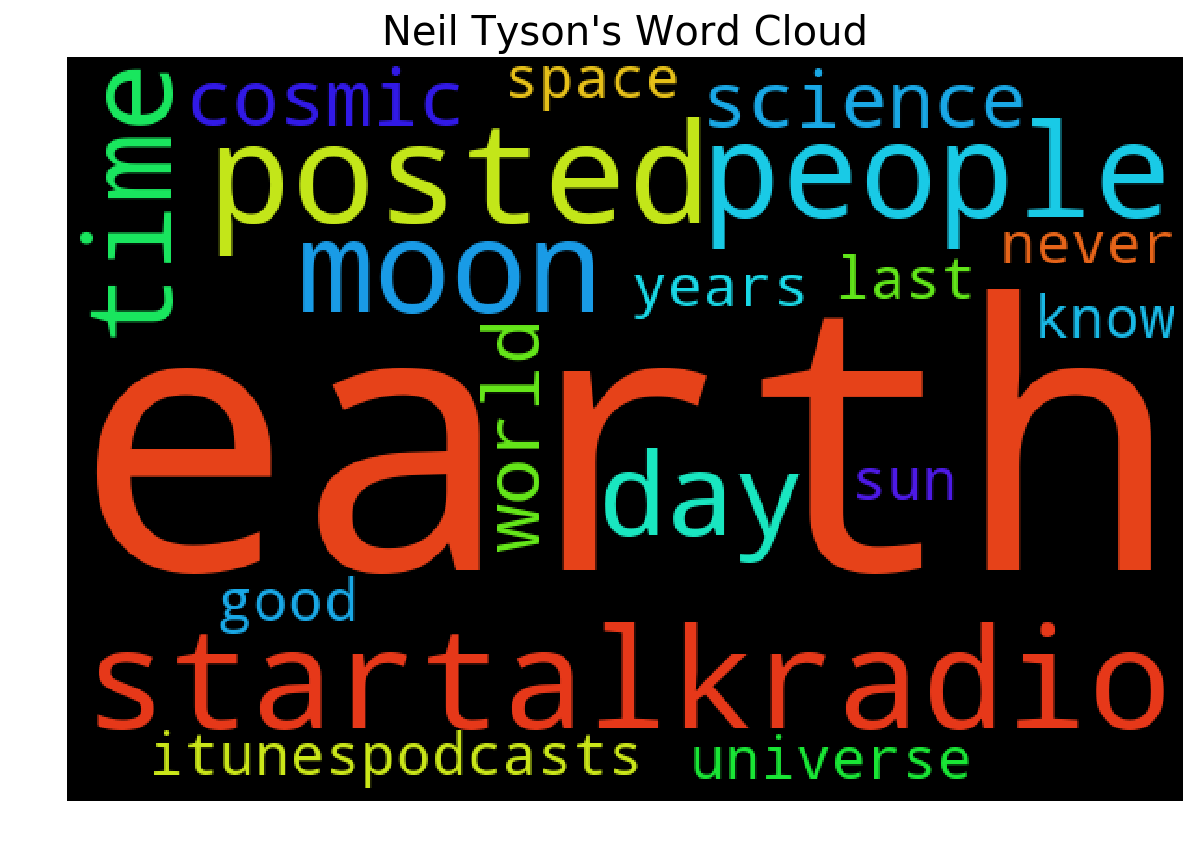

In [41]:
# Visualize Neil Tyson's frequent word use with wordcloud

wordcloud = WordCloud(background_color='black',
                      stopwords = stopwords, 
                     width = 600,
                     height = 400, 
                     ).generate(str(neil_common_words[:50]))


print(wordcloud)
fig = plt.figure(figsize=(10,10))
plt.title("Neil Tyson's Word Cloud", fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Very surprising, Neil talks about the earth and people more than he talks about universe and cosmic. 

---

## Bill or Neil?

Now, do you think we can predict which tweet belong to who?

In [42]:
# combine the two user twitter datasets together

data = pd.concat([bill_df, neil_df])
data.sample(5)

,created_at,favorite_count,handle,hashtags,mined_at,retweet_count,text
877,Thu Feb 26 04:15:49 +0000 2015,1408,Bill Nye,[],2018-01-09 08:47:19.738763,256,You go Jon @TheDailyShow! http://t.co/Mmx08X6uJ1
600,Wed Oct 05 22:36:51 +0000 2016,368,Neil deGrasse Tyson,[],2018-01-09 08:47:21.573146,34,@ivychat Maybe I‘m floating in an atmospheric ...
801,Wed Mar 09 20:56:17 +0000 2016,14393,Neil deGrasse Tyson,[],2018-01-09 08:47:22.187591,3848,I’m simultaneously flattered and disturbed whe...
106,Fri May 26 22:40:45 +0000 2017,0,Bill Nye,[],2018-01-09 08:47:17.707786,44,RT @billnyefilm: We're two weeks out from our ...
235,Wed Jun 28 05:53:19 +0000 2017,77,Neil deGrasse Tyson,[],2018-01-09 08:47:20.553628,23,@whoisjawsh @WombatGombac @dallasnews @joeroga...


In [43]:
#label the two users.

data['user_label'] = data['handle'].map({'Bill Nye': 0, 'Neil deGrasse Tyson': 1})
data.sample(5)


,created_at,favorite_count,handle,hashtags,mined_at,retweet_count,text,user_label
67,Sat Nov 04 15:03:39 +0000 2017,1780,Neil deGrasse Tyson,[],2018-01-09 08:47:20.137651,261,Facts &amp; Ethics of Human Augmentation w/ @d...,1
382,Thu May 19 15:19:54 +0000 2016,0,Bill Nye,[],2018-01-09 08:47:18.116360,258,RT @RobertPicardo: Working a problem in univer...,0
653,Fri Aug 14 02:15:33 +0000 2015,1781,Bill Nye,[],2018-01-09 08:47:19.167300,354,Wow. Just wow. Thank you to all who backed the...,0
837,Thu Feb 18 16:18:53 +0000 2016,11470,Neil deGrasse Tyson,[],2018-01-09 08:47:22.187658,4334,I wonder if workplaces contain too many bosses...,1
64,Sat Nov 11 23:50:34 +0000 2017,20315,Neil deGrasse Tyson,[],2018-01-09 08:47:20.137647,2440,Looks like a condensation-trail left by a plan...,1


In [44]:
# Define independent & dependent variable.
# In this case, the independent variable is the twitter text. The dependent variable would be the user_label.

X = data['text']
y = data['user_label'].values

In [45]:
# Splitting the dataset into the Training set and Test set.
# Since the dataset has 2000 tweets, I use 90% for training and 10% for testing.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

#### Since we are training a computer to learn words and computer only understands numbers, we must convert the tweets into numbers. This process is called vertorization or Bag of Words.
#### scikit-learn has a few packges that can perform this task. The most commone ones are CountVectorizer,  HashingVectorizer, and TfidfVectorizer. 
#### In this case, I am using CountVectorizer to create Bag of Words. CountVectorizer turns a collection of words into numbers and counts the occurrence of each word appear in the twitter dataset.
#### When the tweets are vectorized, they are being transformed into a document-term matrix, short for dtm. Each word (term) will be treated as an independent variable.



In [46]:
# Create the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# Once the corpus is being vectorized and each individual word transfomred into a feature,
# there will be thousands of features. We may just want to use the the most common 1500 words (features)

vect = CountVectorizer(max_features = 1500)

# First fit the corpus
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1500, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [47]:
print (vect.get_feature_names()[:50:2])

['00', '10', '10th', '12', '14', '16', '18', '1st', '2000', '2017', '21', '24', '27', '2m', '30', '30s', '3min', '3rd', '50', '71bdypsq1x', '9th', 'about', 'accurate', 'act', 'actonclimate']


In [48]:
# Then transform the training independent dataset into document term matrix. I called it X_train_dtm

X_train_dtm = vect.transform(X_train)
X_train_dtm

<1800x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 22003 stored elements in Compressed Sparse Row format>

In [49]:
X_train_dtm = X_train_dtm.toarray()
X_train_dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
# Take a look at how the corpus being vectorized. 

pd.DataFrame(X_train_dtm, columns = vect.get_feature_names()).head()

,00,000,10,100,10th,11,12,13,14,15,...,you,young,your,yours,yourself,yrs,yup,yuuup,zeitgeistfilm,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### As you can see, the vectorization process turns each individual word into a feature. 
#### Most people typically use a very small subset of words frequently. This resulting matrix will have many feature values that are zeros (99% of them).
#### For example, the collection of these 2000 tweets may contain 10,000 unique words in total. Each tweet usually use less than 20 unique words. Twitter only allows you to use only 140 characters anyway. 
#### Choosing 1500 words (features) should be sufficient.


## Model Selection

### 1) Gaussian Naive Bayes

One of the most common algorithms for classifier prediction on Natural Language Processing is Gaussian Naive Bayes. This algorithm is based on Baynes Theorem, conditional probability. In this case, we are trying to find out the likelihood of a tweet from either Bill or Neil given the features(the words).

In [51]:
from sklearn.naive_bayes import GaussianNB
gaunb = GaussianNB()
gaunb.fit(X_train_dtm, y_train )

GaussianNB(priors=None)

In [52]:
# In order to make a prediction, the test tweets must have the same features as 
# the training tweets, both in number and meaning. 
# Therefore, we also need to transform the X_test tweets into document-term matrix.

X_test_dtm = vect.transform(X_test)
X_test_dtm = X_test_dtm.toarray()
X_test_dtm


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
pd.DataFrame(X_test_dtm, columns = vect.get_feature_names()).head()

,00,000,10,100,10th,11,12,13,14,15,...,you,young,your,yours,yourself,yrs,yup,yuuup,zeitgeistfilm,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# make predictions using Gaussian Naive Bayes 

y_pred_gaunb = gaunb.predict(X_test_dtm)

In [55]:
# OK, now let's see how accurate the predictions are

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_gaunb)

0.76000000000000001

### 76% accuracy.  That's not bad. 
#### Let's look at the confusion matrix to find out the actual and predictions

In [56]:
confusion_gaunb = metrics.confusion_matrix(y_test, y_pred_gaunb)
confusion_matrix_gaunb = pd.DataFrame(confusion_gaunb, index = ['Actual: Bill', 'Actual: Neil'],
                               columns = ['Predicted: Bill', 'Predicted: Neil'])
confusion_matrix_gaunb

,Predicted: Bill,Predicted: Neil
Actual: Bill,90,6
Actual: Neil,42,62


In [86]:
print ('Prediction accuracy is: ', (90 + 62)/ (90 + 6 + 42 + 62))
print ('Prediction precision for Bill using Gaussion Naive Bayes is: ', 90/(90+42))
print ('Prediction precision for Neil using Gaussion Naive Bayes is: ', 62/(62+6))
print ('Prediction recall/sensitivity for Bill using Gaussion Naive Bayes is:', 90/(90+6))
print ('Prediction recall/sensitivity for Neil using Gaussion Naive Bayes is:', 62/(62+42))


Prediction accuracy is:  0.76
Prediction precision for Bill using Gaussion Naive Bayes is:  0.6818181818181818
Prediction precision for Neil using Gaussion Naive Bayes is:  0.9117647058823529
Prediction recall/sensitivity for Bill using Gaussion Naive Bayes is: 0.9375
Prediction recall/sensitivity for Neil using Gaussion Naive Bayes is: 0.5961538461538461


In [65]:
# Or we can print the classification report 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gaunb))

             precision    recall  f1-score   support

          0       0.68      0.94      0.79        96
          1       0.91      0.60      0.72       104

avg / total       0.80      0.76      0.75       200



In [69]:
# Refer to the user label, 0 is Bill and 1 is Neil.
# Check Bill's tweets incorrectly identified as Neil's
# If the label in y_test is 0 and y_pred is 1, this means the Bill's tweets are incorrectly identified as Neil's. 

incorrect_bill_prediction = pd.DataFrame(X_test[y_test < y_pred_gaunb])
incorrect_bill_prediction

,text
247,My grandmother kept this paper. It was the day...
184,Analyzing space policy is part of my day job. ...
222,Solar panels &amp; solar hot water system on r...
909,Wait there's more: Football + Blizzard (is it ...
611,I'm deeply sorry for those affected by today's...
6,Happy Solstice! Shortest day for us North hemi...


Both Bill and Neil tweet about climate change and cosmos a lot. These tweets here also sound like Neil's. 

In [71]:
# Check Neil's tweets incorrectly identified as Bill's
# Similary, iff the label in y_test is 1 and y_pred is 0, this means the Neil's tweets are incorrectly 
# identified as Bill's. 

incorrect_neil_prediction = pd.DataFrame(X_test[y_test > y_pred_gaunb])
incorrect_neil_prediction.sample(10)

,text
836,A bit disappointed that the corrugated shippin...
922,@Roy_Wilhelm — Please send your best link of m...
702,"A skeptic will question claims, then embrace t..."
96,In the years that followed Sputnik’s 1957 laun...
5,Two @StarTalkRadio end-of-year mashups….
154,Hmm. Don’t see much denial of @NOAA climate sc...
409,We can all imagine a land that provides no sup...
24,Navigating stuff for sale:\n\nhttps://t.co/dA5...
42,@Johnn128 Thanks! Will alert the publisher.
124,"@AvaSchiffer Key phrase “...as space reveals it…"""


On line item 154, Bill tweets about climate frequently. I wonder why the computer thinks this tweet actually belong to Bill instead of Neil. 

In [78]:
# Let's check prediction probability

y_pred_prob_gaunb = gaunb.predict_proba(X_test_dtm)[:, 1]

In [79]:
metrics.roc_auc_score(y_test, y_pred_prob_gaunb)

0.87720352564102555

### 87.7%  That is quite good. 

### 2) Logistic Regression

Another very effective algorithm on binary classifiction prediction is Logistic Regression. This is based on odd ratio. In this case, what is the odd of a tweet coming from Bill or Neil. 

Let's try if Logistic Regression can improve prediction accuracy.

In [80]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train_dtm, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
# Make predictions using Logistic Regression model

y_pred_logit = logit.predict(X_test_dtm)

In [82]:
# Check Logistic Regression prediction accuracy rate

metrics.accuracy_score(y_test, y_pred_logit)

0.89000000000000001

**89% accuracy, not bad! There is a lot of improvement than the Guassian Naive Bayes predictions **

In [83]:
confusion_logit = metrics.confusion_matrix(y_test, y_pred_logit)
confusion_matrix_logit = pd.DataFrame(confusion_logit, index = ['Actual: Bill', 'Actual: Neil'],
                               columns = ['Predicted: Bill', 'Predicted: Neil'])
confusion_matrix_logit

,Predicted: Bill,Predicted: Neil
Actual: Bill,85,11
Actual: Neil,11,93


In [85]:
print ('Prediction accuracy is: ', (85 + 93)/ (85 + 11 + 11 + 93))
print ('Prediction precision for Bill using Logistic Regression is: ', 85/(85+11))
print ('Prediction precision for Neil using Logistic Regression is: ', 93/(93+11))
print ('Prediction recall/sensitivity for Bill using Logistic Regression is:', 85/(85+11))
print ('Prediction recall/sensitivity for Neil using Gaussion Naive Bayes is:', 93/(93+11))


Prediction accuracy is:  0.89
Prediction precision for Bill using Logistic Regression is:  0.8854166666666666
Prediction precision for Neil using Logistic Regression is:  0.8942307692307693
Prediction recall/sensitivity for Bill using Logistic Regression is: 0.8854166666666666
Prediction recall/sensitivity for Neil using Gaussion Naive Bayes is: 0.8942307692307693


In [87]:
print(classification_report(y_test, y_pred_logit))

             precision    recall  f1-score   support

          0       0.89      0.89      0.89        96
          1       0.89      0.89      0.89       104

avg / total       0.89      0.89      0.89       200



In [88]:
incorrect_logit_bill_prediction = pd.DataFrame(X_test[y_test < y_pred_logit])
incorrect_logit_bill_prediction

,text
206,Congrats @PersilProClean Original- named best ...
247,My grandmother kept this paper. It was the day...
926,@JasonHughes7 Roger that!
366,Seems that @realDonaldTrump is unaware that ev...
347,What DOES it all mean? Find out with me and @h...
222,Solar panels &amp; solar hot water system on r...
746,We're letting more than 25 of you youngsters i...
696,"@SawyerFoyle that, my friend, is awesome."
263,Super Moon comes to North America tonight. 14%...
925,@watchinvacation Enjoy!


In [89]:
incorrect_logit_neil_prediction = pd.DataFrame(X_test[y_test > y_pred_logit])
incorrect_logit_neil_prediction

,text
586,I like new ideas &amp; old wines. New software...
253,"Eratosthenes, of course. Third century BC. Ca..."
470,@seanmdav Of possible interest to your followe...
707,Nobody doesn’t love exoplanets. https://t.co/c...
27,Two scientists walk into a bar.\n“I’ll have H2...
214,@kerberos858 @IAmSteveHarvey https://t.co/Arkz...
357,The only time I ever mentioned Bill O’Reilly: ...
333,No. I have pretty good balance for my body siz...
504,"Athlete, Educator, Civil Rights Activist, Publ..."
411,The fastest way to thwart Earth's life-support...


In [92]:
# Let's check prediction probability

y_pred_prob_logit = logit.predict_proba(X_test_dtm)[:, 1]

metrics.roc_auc_score(y_test, y_pred_prob_logit)

0.9547275641025641

### 95% Accuracy Under the Curve (AUC). This is a very good result!

---

## Model Evaluation - K-fold Cross Validation

So often, predictions on training set does not perform as well on the unseen observations, especially if a model is over fitted. Cross validation finds the bias and variance trade-off and usually give us a pretty good idea how the model performs on unseen observations.

This is because k-fold cross validation randomly splits the dataset into equal k folds, using one fold for validation and k-1 for training. The validation fold being treats as unseen data. This process repeats for k times. Historically proven, when dataset split into 5 or 10 folds yields the best results. Let's validate the Naive Bayes and the Logistic Regression models. 

In [97]:
from sklearn.model_selection import cross_val_score

print('Gaussian Naive Bayes model cross validation score is: ', np.mean(cross_val_score(gaunb, X_train_dtm, y_train, \
                                                                                        cv = 10, scoring = 'accuracy')))

Gaussian Naive Bayes model cross validation score is:  0.843329355158


In [98]:
print('Logistic Regression model cross validation score is: ', np.mean(cross_val_score(logit, X_train_dtm, y_train, \
                                                                                       cv = 10, scoring = 'accuracy')))

Logistic Regression model cross validation score is:  0.899454321292


### Both Naive Bayes and Logistic Regression models yields cross validation accuracy scores of 84% and 90% respectively. Not a bad result. Logistic Regression performs much better than Naive Bayes. 